# Rainfall prediction Using ML & DL

In [1]:
import pandas as pd

### Load the Dataset

In [388]:
df = pd.read_csv("Rainfall.csv")

In [389]:
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [390]:
df.shape

(366, 12)

In [391]:
df.isnull().sum()

day                       0
pressure                  0
maxtemp                   0
temparature               0
mintemp                   0
dewpoint                  0
humidity                  0
cloud                     0
rainfall                  0
sunshine                  0
         winddirection    1
windspeed                 1
dtype: int64

In [392]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

## Columns name changes 

In [393]:
df.rename(columns = {"         winddirection":"winddirection"},inplace = True)

In [394]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

## Fill the nan place with the help of mode of the data 

In [395]:
df["winddirection"] = df["winddirection"].fillna(df["winddirection"].mode()[0])

In [396]:
df["windspeed"] = df["windspeed"].fillna(df["windspeed"].mode()[0])

In [397]:
df.isnull().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [398]:
df.duplicated().sum()

0

## Apply LabelEncoder on Rainfall column 

In [399]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

In [400]:
df["rainfall"] = lab.fit_transform(df["rainfall"])

## EDA

In [401]:
import matplotlib.pyplot as plt
import seaborn as sns

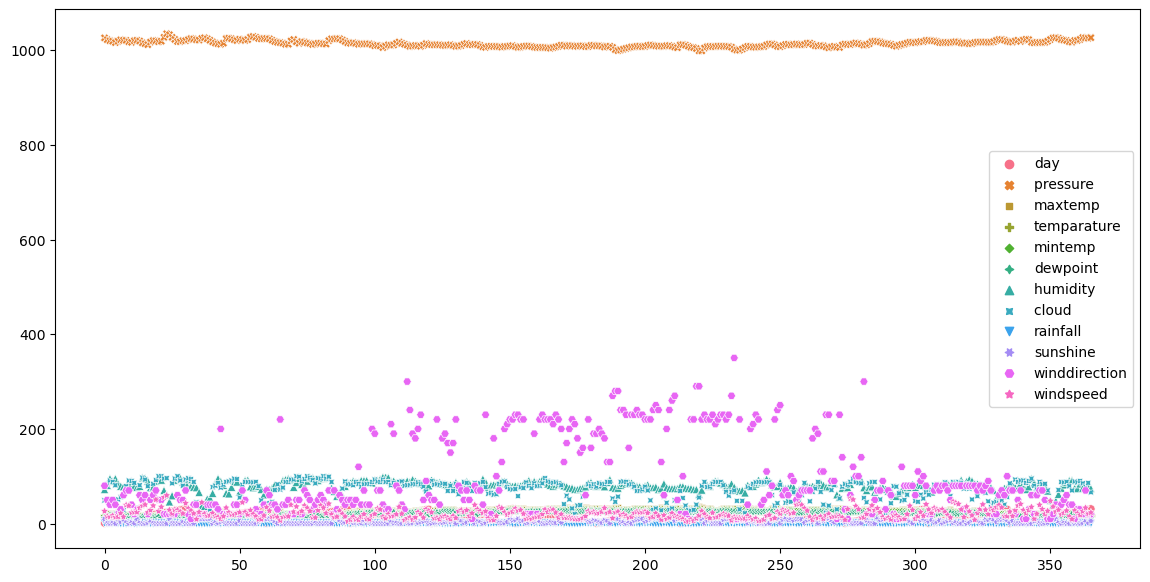

In [402]:
plt.figure(figsize = (14,7))
sns.scatterplot(df)
plt.show()

In [403]:
df.corr()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
day,1.000000,0.044638,-0.017045,-0.014100,-0.009241,-0.051521,-0.118652,-0.113152,0.010339,0.108927,0.044204,-0.030391
pressure,0.044638,1.000000,-0.829088,-0.851780,-0.839851,-0.860232,-0.274907,0.005621,-0.089275,-0.198171,-0.656828,0.375391
maxtemp,-0.017045,-0.829088,1.000000,0.986193,0.961534,0.899829,0.021882,-0.289765,-0.101003,0.507416,0.625447,-0.443311
temparature,-0.014100,-0.851780,0.986193,1.000000,0.990187,0.936866,0.092030,-0.205895,-0.037360,0.420545,0.645266,-0.394653
mintemp,-0.009241,-0.839851,0.961534,0.990187,1.000000,0.944515,0.139040,-0.156097,-0.007697,0.368288,0.629738,-0.360152
dewpoint,-0.051521,-0.860232,0.899829,0.936866,0.944515,1.000000,0.425282,0.044635,0.139916,0.185234,0.623952,-0.379535
humidity,-0.118652,-0.274907,0.021882,0.092030,0.139040,0.425282,1.000000,0.655493,0.489623,-0.563579,0.099471,-0.077635
cloud,-0.113152,0.005621,-0.289765,-0.205895,-0.156097,0.044635,0.655493,1.000000,0.625766,-0.848334,-0.077037,0.257489
rainfall,0.010339,-0.089275,-0.101003,-0.037360,-0.007697,0.139916,0.489623,0.625766,1.000000,-0.552519,-0.015058,0.152974
sunshine,0.108927,-0.198171,0.507416,0.420545,0.368288,0.185234,-0.563579,-0.848334,-0.552519,1.000000,0.251374,-0.299591


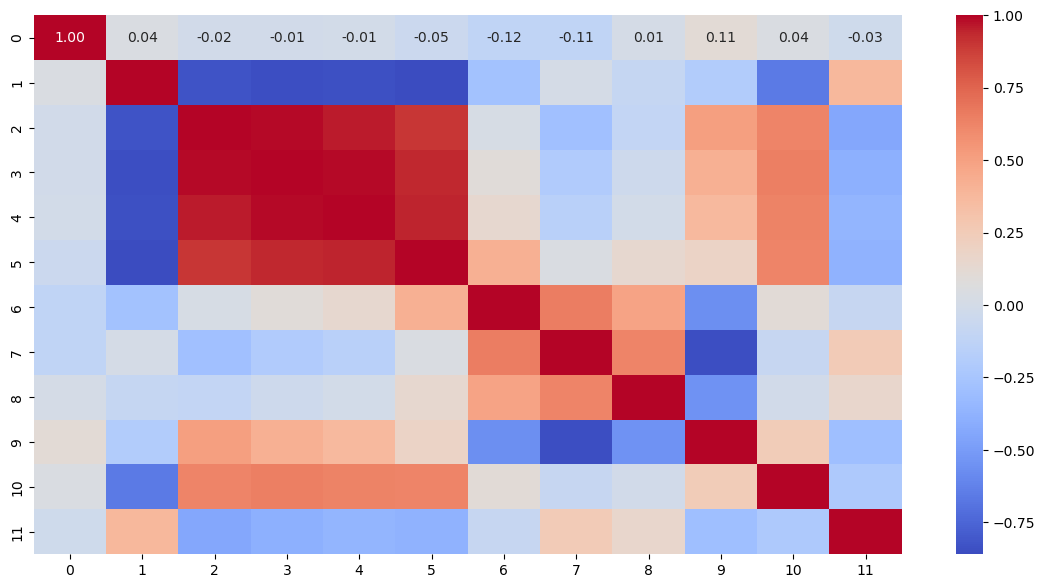

In [404]:
plt.figure(figsize = (14,7))
sns.heatmap(df.corr().values,annot = True,cmap = "coolwarm",fmt = ".2f")
plt.show()

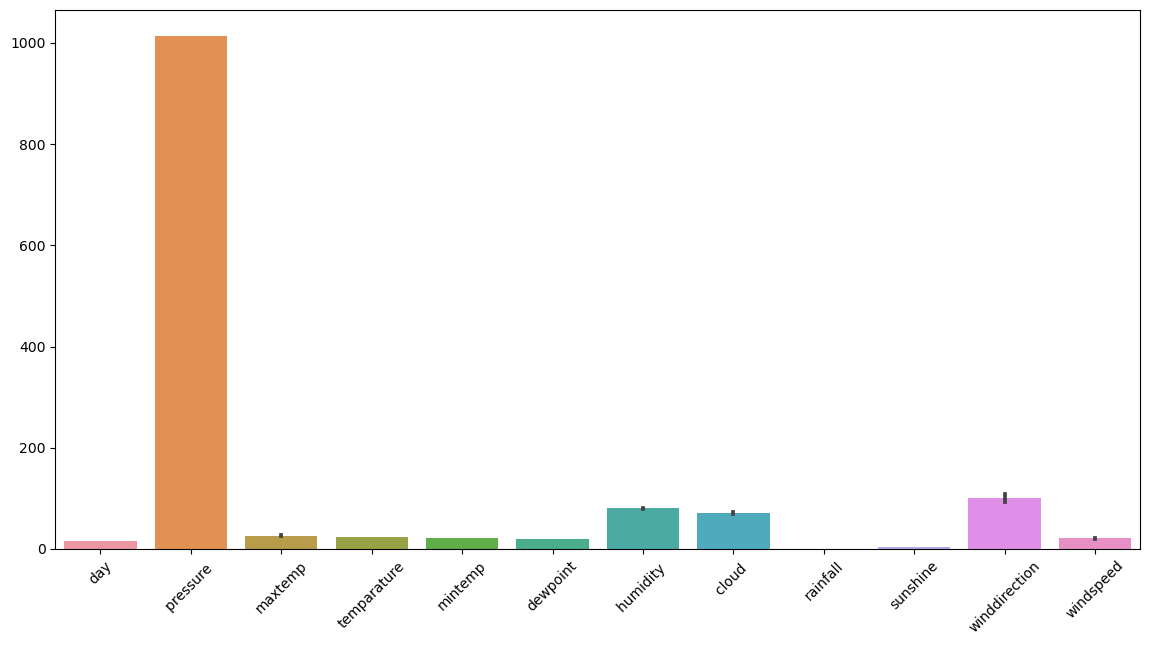

In [405]:
plt.figure(figsize = (14,7))
sns.barplot(df)
plt.xticks(rotation = 45)
plt.show()

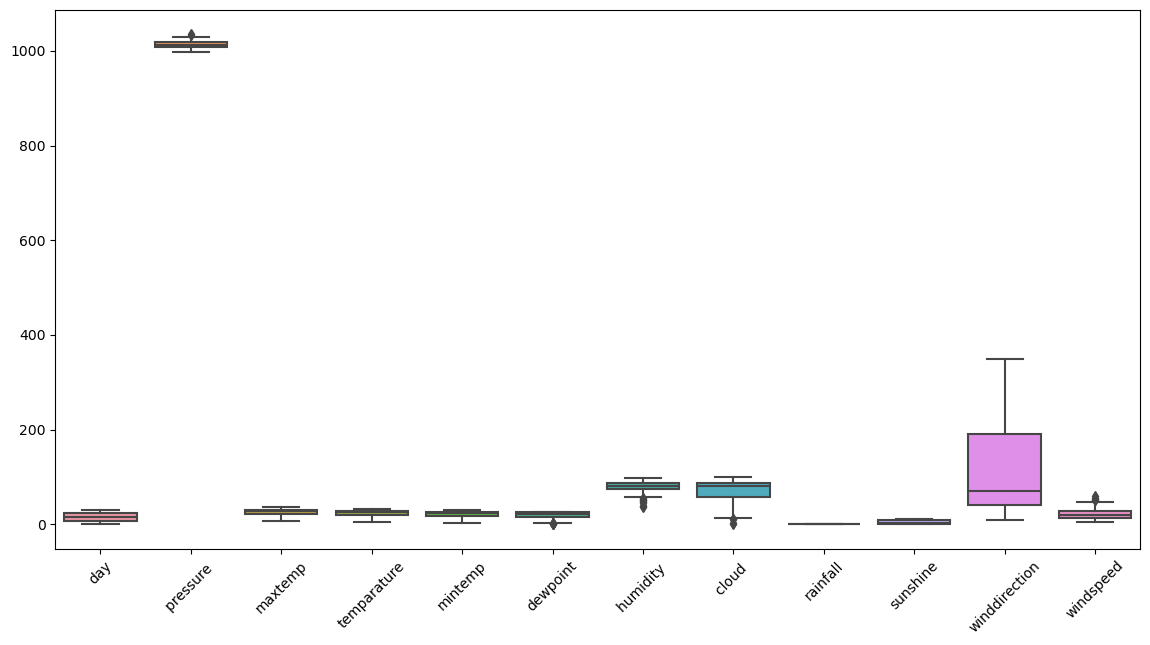

In [406]:
plt.figure(figsize = (14,7))
sns.boxplot(df)
plt.xticks(rotation = 45)
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


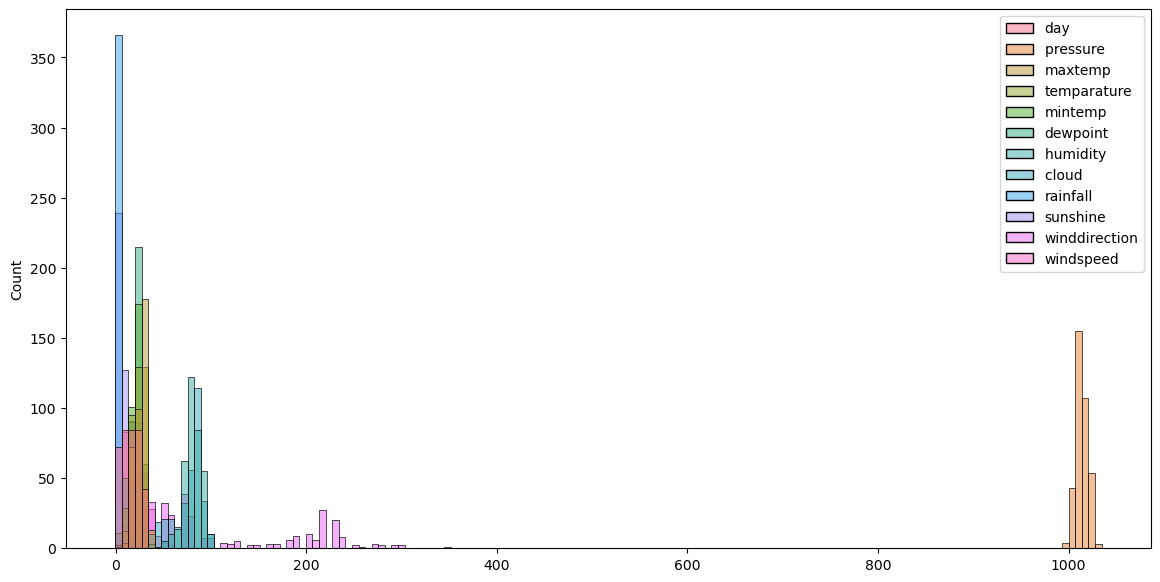

In [407]:
plt.figure(figsize = (14,7))
sns.histplot(df)
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


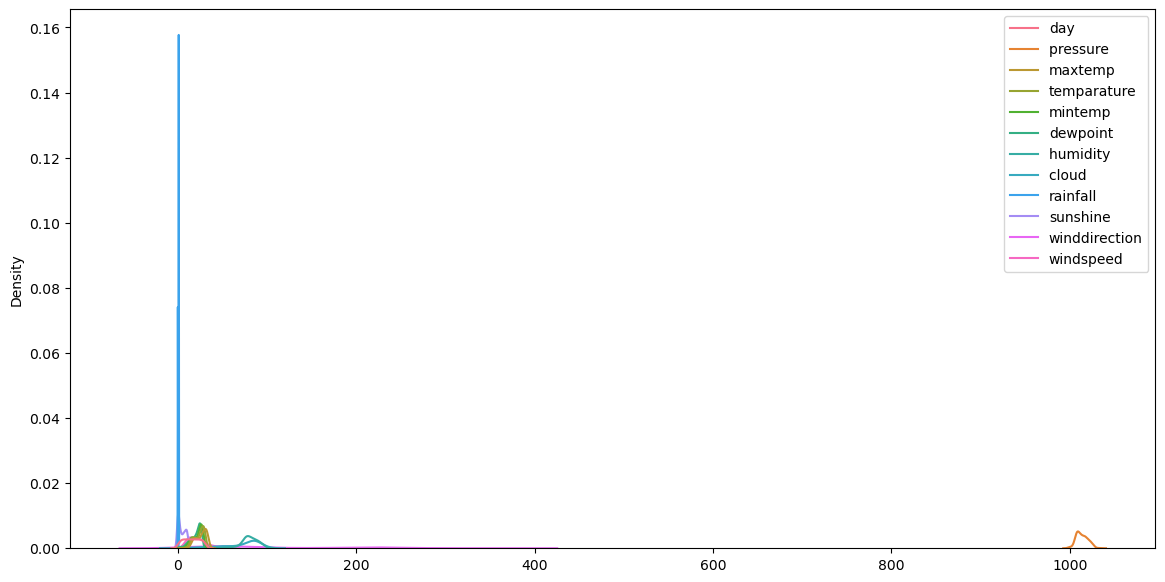

In [408]:
plt.figure(figsize = (14,7))
sns.kdeplot(df)
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


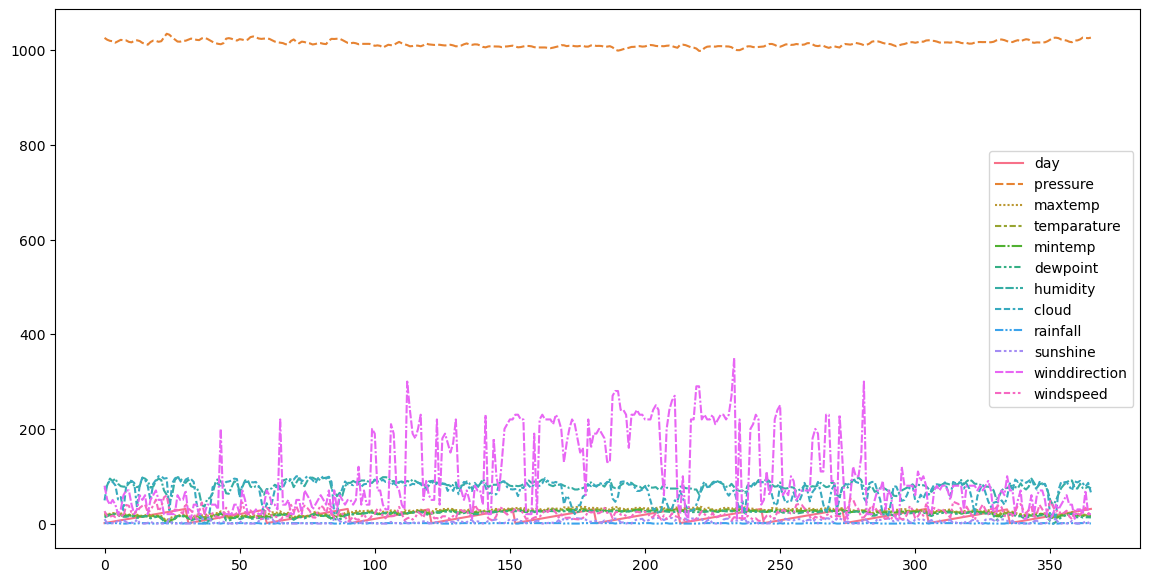

In [409]:
plt.figure(figsize = (14,7))
sns.lineplot(df)
plt.show()

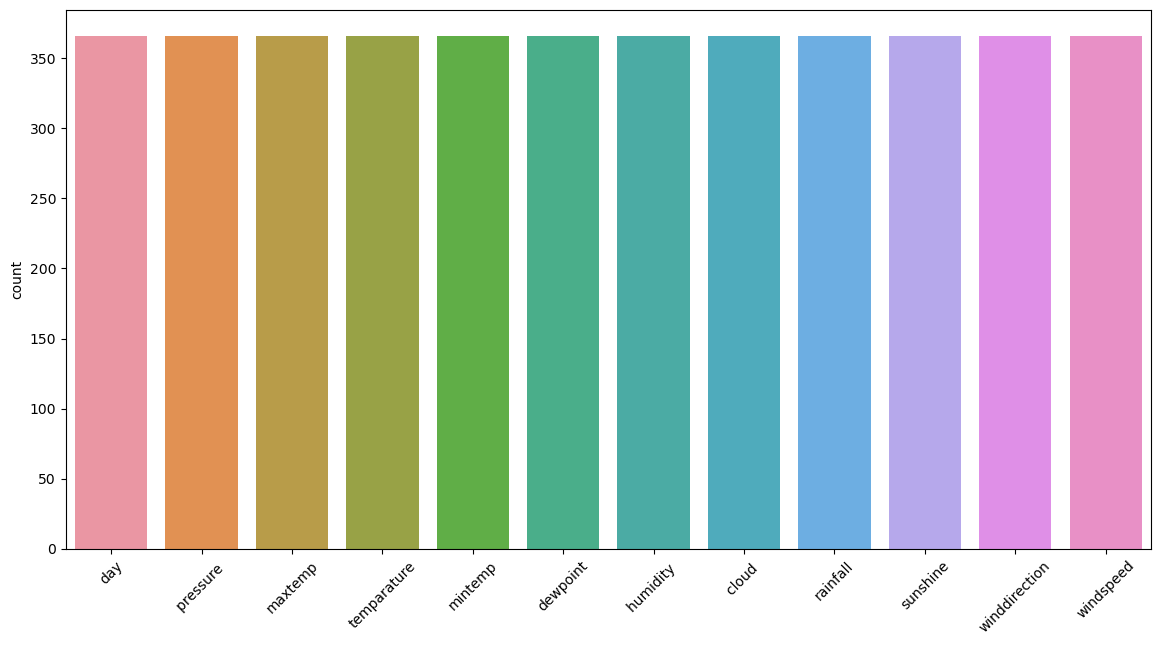

In [410]:
plt.figure(figsize = (14,7))
sns.countplot(df)
plt.xticks(rotation = 45)
plt.show()

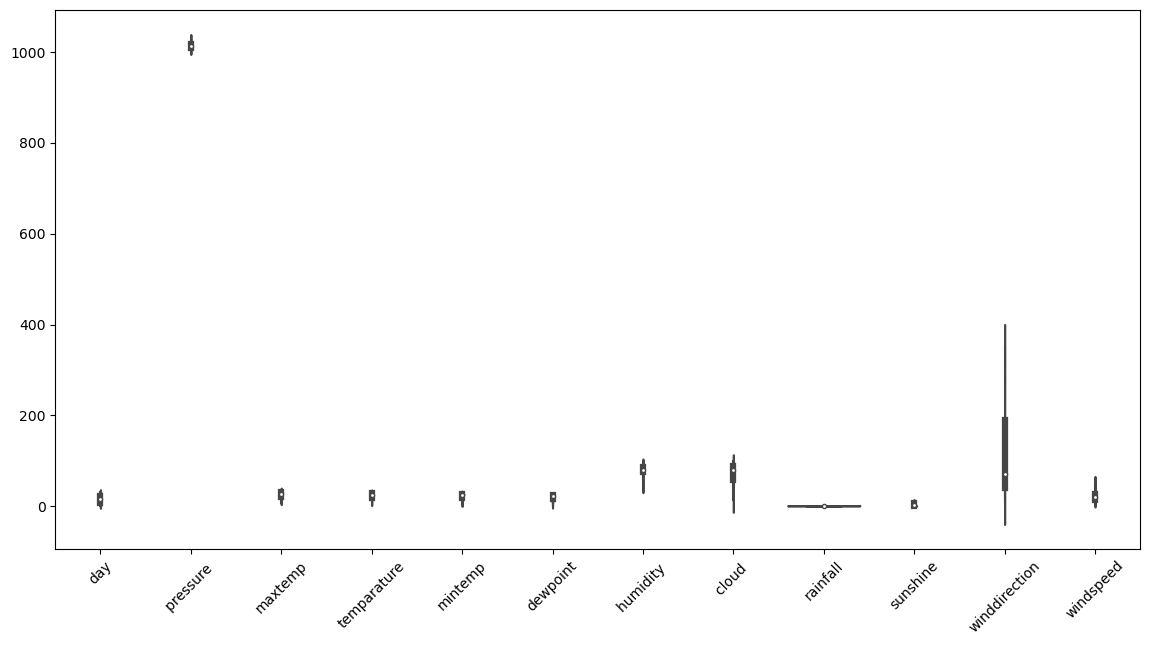

In [411]:
plt.figure(figsize = (14,7))
sns.violinplot(df)
plt.xticks(rotation = 45)
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


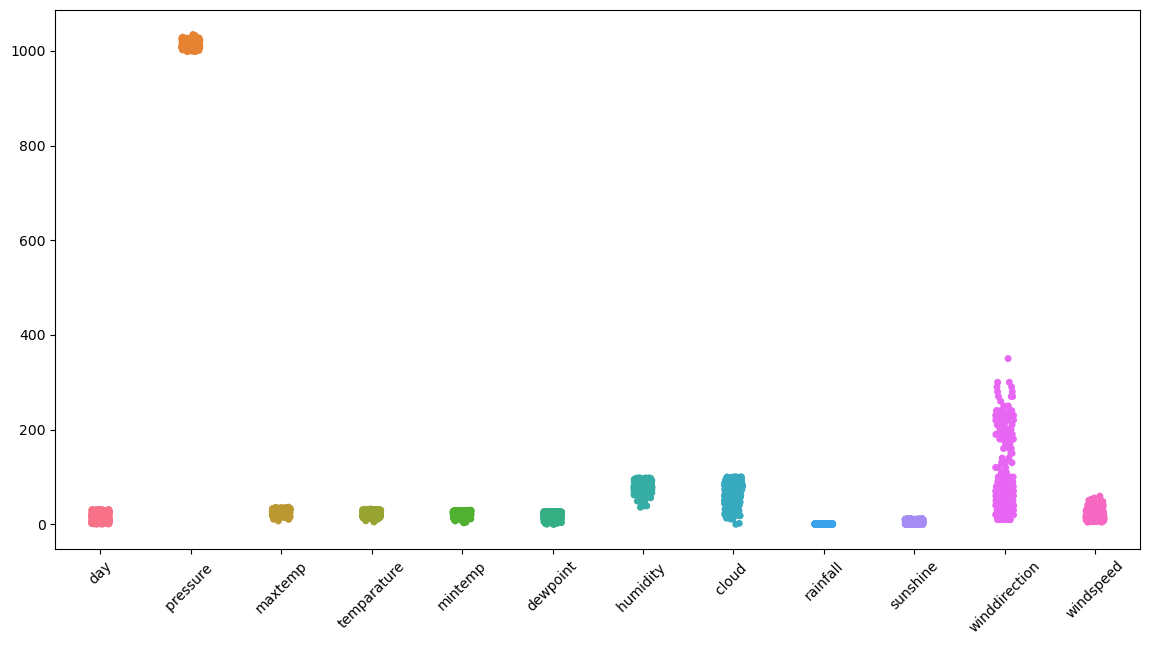

In [412]:
plt.figure(figsize = (14,7))
sns.stripplot(df)
plt.xticks(rotation = 45)
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 92.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 91.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\Lib\site-p

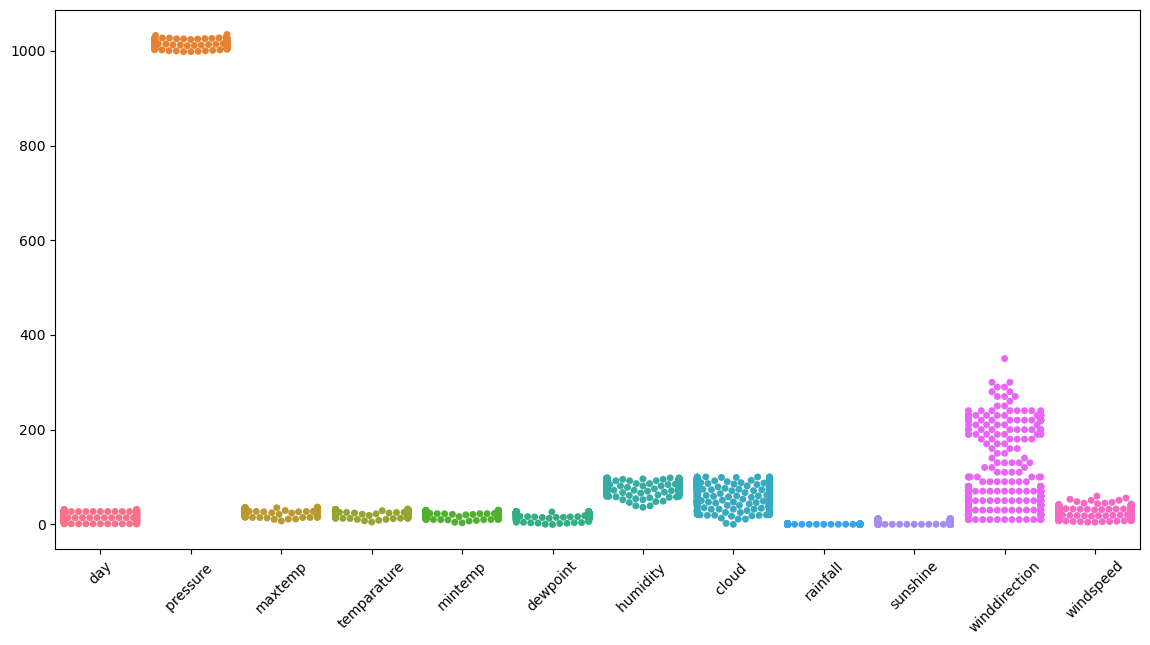

In [413]:
plt.figure(figsize = (14,7))
sns.swarmplot(df)
plt.xticks(rotation = 45)
plt.show()

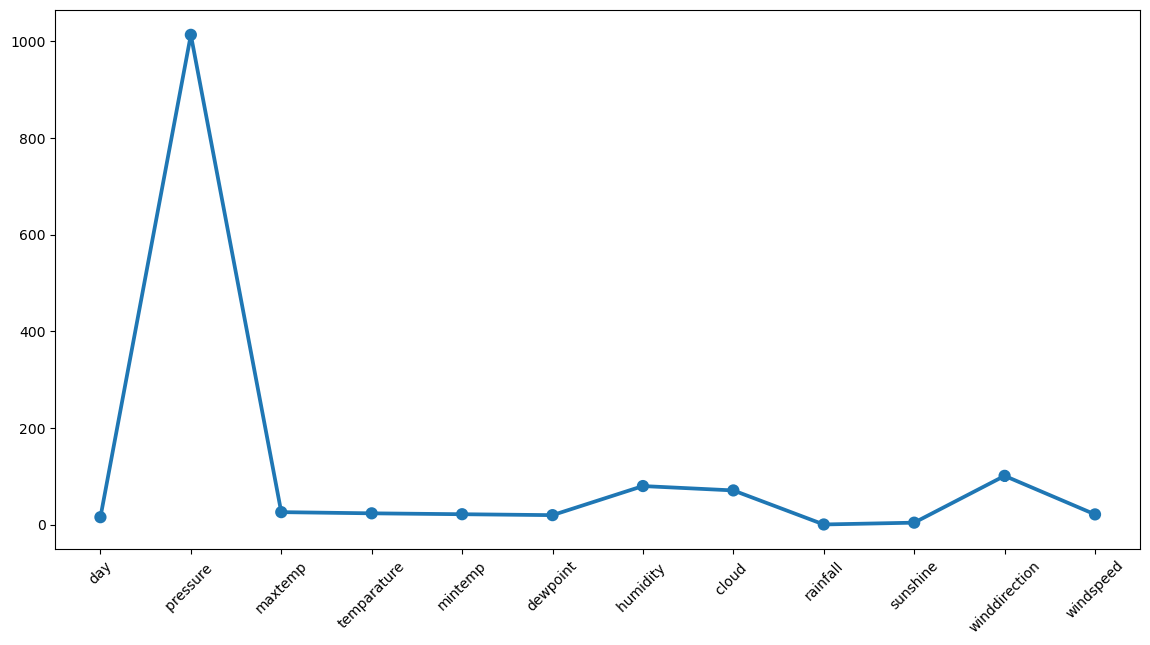

In [414]:
plt.figure(figsize = (14,7))
sns.pointplot(df)
plt.xticks(rotation = 45)
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1400x700 with 0 Axes>

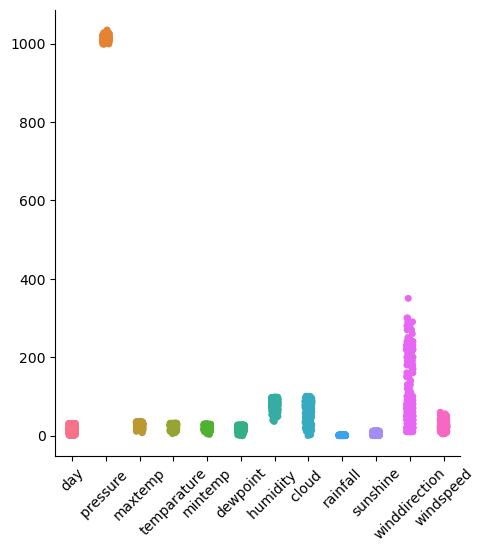

In [415]:
plt.figure(figsize = (14,7))
sns.catplot(df)
plt.xticks(rotation = 45)
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


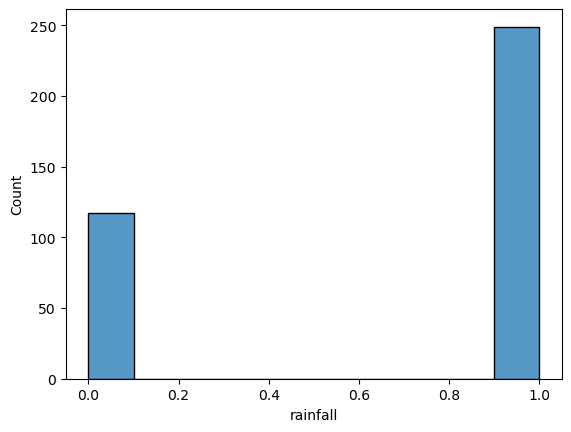

In [416]:
sns.histplot(df["rainfall"])
plt.show()

## Resampling of data 

In [417]:
from sklearn.utils import resample

In [418]:
df_majority = df[df["rainfall"] == 1]
df_minority = df[df["rainfall"] == 0]

In [419]:
df_majority.shape , df_minority.shape

((249, 12), (117, 12))

In [420]:
df_downsampling = resample(df_majority,replace = False,n_samples=len(df_minority),random_state = 42)

In [421]:
df_oversampling.shape

(117, 12)

In [422]:
df_majority.shape , df_minority.shape

((249, 12), (117, 12))

## concat the data 

In [423]:
df_new = pd.concat([df_oversampling,df_minority])

In [424]:
df_new.shape

(234, 12)

## Drop the day column from dataset

In [425]:
df_new = df_new.drop(columns = ["day"])

## Suffling the dataset

In [426]:
df_new = df_new.sample(frac = True).reset_index(drop = True)

In [427]:
df_new["rainfall"].value_counts()

rainfall
1    117
0    117
Name: count, dtype: int64

In [428]:
df_new.shape

(234, 11)

In [429]:
df_new.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1009.1,32.0,28.9,27.3,25.3,81,40,1,6.8,110.0,10.2
1,1015.3,25.5,21.5,19.1,18.9,86,83,0,6.1,50.0,4.5
2,1013.0,30.7,27.0,24.8,21.6,73,50,0,8.3,80.0,9.9
3,1012.1,29.8,26.6,24.4,23.7,85,75,1,7.7,50.0,15.7
4,1011.2,32.2,28.9,26.9,24.6,78,69,0,10.7,20.0,11.8


## Feature Selection

In [430]:
x = df_new.drop(columns = ["rainfall"])
y = df_new["rainfall"]

In [433]:
z.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1009.1,32.0,28.9,27.3,25.3,81,40,6.8,110.0,10.2
1,1015.3,25.5,21.5,19.1,18.9,86,83,6.1,50.0,4.5
2,1013.0,30.7,27.0,24.8,21.6,73,50,8.3,80.0,9.9
3,1012.1,29.8,26.6,24.4,23.7,85,75,7.7,50.0,15.7
4,1011.2,32.2,28.9,26.9,24.6,78,69,10.7,20.0,11.8


In [434]:
x.head(10)

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1009.1,32.0,28.9,27.3,25.3,81,40,6.8,110.0,10.2
1,1015.3,25.5,21.5,19.1,18.9,86,83,6.1,50.0,4.5
2,1013.0,30.7,27.0,24.8,21.6,73,50,8.3,80.0,9.9
3,1012.1,29.8,26.6,24.4,23.7,85,75,7.7,50.0,15.7
4,1011.2,32.2,28.9,26.9,24.6,78,69,10.7,20.0,11.8
5,1004.2,31.7,30.2,29.2,26.6,81,88,2.4,220.0,30.0
6,1009.1,35.1,31.3,29.4,26.3,75,57,9.9,160.0,11.9
7,1022.5,17.2,15.2,13.4,4.3,49,11,9.3,10.0,48.0
8,1007.9,29.6,28.0,26.4,25.6,87,84,0.1,230.0,22.9
9,1012.0,26.3,24.5,23.4,19.9,76,79,4.8,70.0,30.3


In [435]:
y.sample(5)

199    1
192    0
96     1
143    0
160    1
Name: rainfall, dtype: int32

## Scaling the Dataset 

In [436]:
from sklearn.preprocessing import RobustScaler
std = RobustScaler()

In [437]:
x = std.fit_transform(x)

## Train test split

In [438]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

## Apply Logistic Regression

In [439]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state = 42)

In [440]:
lg.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [441]:
from sklearn.metrics import accuracy_score
y_pred = lg.predict(x_test)
print("Accuracy_Score = ",accuracy_score(y_test,y_pred))

Accuracy_Score =  0.851063829787234


## Apply Perceptron 

In [442]:
from sklearn.linear_model import Perceptron
per = Perceptron()

In [443]:
per.fit(x_train,y_train)

Perceptron()

In [444]:
y_pred = per.predict(x_test)
print("Accuracy_score = ",accuracy_score(y_test,y_pred))

Accuracy_score =  0.7872340425531915


## Apply KNeighborsClassifier 

In [445]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [446]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [447]:
y_pred = knn.predict(x_test)
print("Accuracy_score = ",accuracy_score(y_test,y_pred))

Accuracy_score =  0.7446808510638298


## Apply Support Vector Machine

In [448]:
from sklearn.svm import SVC
svc = SVC()

In [449]:
svc.fit(x_train,y_train)

SVC()

In [450]:
y_pred = svc.predict(x_test)
print("Accuracy_Score = ",accuracy_score(y_test,y_pred))

Accuracy_Score =  0.8297872340425532


## Apply Naive Bayes

In [451]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [452]:
nb.fit(x_train,y_train)

GaussianNB()

In [453]:
y_pred = nb.predict(x_test)
print("Accuracy_score = ",accuracy_score(y_test,y_pred))

Accuracy_score =  0.7872340425531915


## Appling RidgeClassifier

In [454]:
from sklearn.linear_model import RidgeClassifier
rid = RidgeClassifier()

In [455]:
rid.fit(x_train,y_train)

RidgeClassifier()

In [456]:
y_pred = rid.predict(x_test)
print("Accuracy_score = ",accuracy_score(y_test,y_pred))

Accuracy_score =  0.7659574468085106


## Apply DecisionTreeClassifier

In [457]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [458]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [459]:
y_pred = dt.predict(x_test)
print("Accuracy_Score = ",accuracy_score(y_test,y_pred))

Accuracy_Score =  0.7446808510638298


## Apply RandomForestClassifier

In [460]:
from sklearn.ensemble import RandomForestClassifier
rd = RandomForestClassifier()

In [461]:
rd.fit(x_train,y_train)

RandomForestClassifier()

In [462]:
y_pred = rd.predict(x_test)
print("Accuracy_score = ",accuracy_score(y_test,y_pred))

Accuracy_score =  0.8723404255319149


## Apply BaggingClassifier

In [463]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier()

In [464]:
bag.fit(x_train,y_train)

BaggingClassifier()

In [465]:
y_pred = bag.predict(x_test)
print("Accuracy_score = ",accuracy_score(y_test,y_pred))

Accuracy_score =  0.8723404255319149


## Apply XGBOOST Classifier

In [466]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [467]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [468]:
y_pred = xgb.predict(x_test)
print("Accuracy_score = ",accuracy_score(y_test,y_pred))

Accuracy_score =  0.7872340425531915


## Apply LightGBM

In [469]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()

In [470]:
lgbm.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 91, number of negative: 96
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 478
[LightGBM] [Info] Number of data points in the train set: 187, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.486631 -> initscore=-0.053489
[LightGBM] [Info] Start training from score -0.053489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

LGBMClassifier()

In [471]:
y_pred = lgbm.predict(x_test)
print("Accuracy_score = ",accuracy_score(y_test,y_pred))

Accuracy_score =  0.8085106382978723


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


## Apply CatBoostClassifier

In [472]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier()

In [473]:
cat.fit(x_train,y_train)

Learning rate set to 0.005035
0:	learn: 0.6900704	total: 18.6ms	remaining: 18.6s
1:	learn: 0.6873178	total: 21.6ms	remaining: 10.8s
2:	learn: 0.6847101	total: 24ms	remaining: 7.97s
3:	learn: 0.6816424	total: 26.9ms	remaining: 6.7s
4:	learn: 0.6784885	total: 29.6ms	remaining: 5.88s
5:	learn: 0.6754851	total: 32.2ms	remaining: 5.34s
6:	learn: 0.6723303	total: 34.7ms	remaining: 4.93s
7:	learn: 0.6693833	total: 37.2ms	remaining: 4.61s
8:	learn: 0.6669643	total: 39.6ms	remaining: 4.36s
9:	learn: 0.6643568	total: 43.6ms	remaining: 4.31s
10:	learn: 0.6614174	total: 46.1ms	remaining: 4.14s
11:	learn: 0.6588913	total: 48.5ms	remaining: 3.99s
12:	learn: 0.6561544	total: 50.9ms	remaining: 3.86s
13:	learn: 0.6539609	total: 53.3ms	remaining: 3.76s
14:	learn: 0.6521173	total: 55.9ms	remaining: 3.67s
15:	learn: 0.6491630	total: 58.5ms	remaining: 3.6s
16:	learn: 0.6470354	total: 61ms	remaining: 3.53s
17:	learn: 0.6441037	total: 63.5ms	remaining: 3.46s
18:	learn: 0.6413341	total: 66ms	remaining: 3.41s


In [474]:
y_pred = cat.predict(x_test)
print("ACcuracy_score = ",accuracy_score(y_test,y_pred))

ACcuracy_score =  0.8085106382978723


## Apply GradientBoostingClassifier

In [475]:
from sklearn.ensemble import GradientBoostingClassifier
gd = GradientBoostingClassifier(learning_rate = 0.9,random_state = 42)

In [476]:
gd.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.9, random_state=42)

In [477]:
y_pred =gd.predict(x_test)
print("Accuracy_Score = ",accuracy_score(y_test,y_pred))

Accuracy_Score =  0.8085106382978723


## Apply BaggingClassifier

In [478]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(estimator = lg)

In [479]:
bag.fit(x_train,y_train)

BaggingClassifier(estimator=LogisticRegression(random_state=42))

In [480]:
y_pred = bag.predict(x_test)
print("ACcuracy_score = ",accuracy_score(y_test,y_pred))

ACcuracy_score =  0.8297872340425532


## Apply AdaBoostClassifier

In [481]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(estimator = gd,learning_rate = 0.9)

In [482]:
ada.fit(x_train,y_train)

AdaBoostClassifier(estimator=GradientBoostingClassifier(learning_rate=0.9,
                                                        random_state=42),
                   learning_rate=0.9)

In [483]:
y_pred = ada.predict(x_test)
print("Accuracy_score = ",accuracy_score(y_test,y_pred))

Accuracy_score =  0.8085106382978723


In [484]:
params = [("lg",lg),("rd",rd),("knn",knn),("svc",svc),("rid",rid),("xgb",xgb),("lgbm",lgbm),("cat",cat),("gd",gd),
          ("bag",bag),("ada",ada)]

## Apply VotingClassifier

In [485]:
from sklearn.ensemble import VotingClassifier
vt = VotingClassifier(estimators = params)

In [486]:
vt.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 91, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 478
[LightGBM] [Info] Number of data points in the train set: 187, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.486631 -> initscore=-0.053489
[LightGBM] [Info] Start training from score -0.053489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

VotingClassifier(estimators=[('lg', LogisticRegression(random_state=42)),
                             ('rd', RandomForestClassifier()),
                             ('knn', KNeighborsClassifier()), ('svc', SVC()),
                             ('rid', RidgeClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enab...
                             ('lgbm', LGBMClassifier()),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x000001D115328DD0>),
                             ('gd',
                              GradientBoostingClassifier(learning_rate=0.9,
                                                         random_state=42)),
                             ('bag',
                              BaggingClassifier(estimator=LogisticRegression(random_state=42))),
                             ('ada',
                              AdaBoostClassifier(estimator=GradientBoostingClassifier(learning_rate=0.9,
                                                                                      random_state=42),
                                                 learning_rate=0.9))])

In [487]:
y_pred = vt.predict(x_test)
print("ACcuracy_score = ",accuracy_score(y_test,y_pred))

ACcuracy_score =  0.851063829787234


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


## Apply StackingClassifier

In [488]:
from sklearn.ensemble import StackingClassifier
st = StackingClassifier(estimators = params,final_estimator = lg)

In [489]:
st.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 91, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 478
[LightGBM] [Info] Number of data points in the train set: 187, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.486631 -> initscore=-0.053489
[LightGBM] [Info] Start training from score -0.053489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier wa

11:	learn: 0.6591688	total: 30.8ms	remaining: 2.53s
12:	learn: 0.6567852	total: 35ms	remaining: 2.66s
13:	learn: 0.6534511	total: 39.8ms	remaining: 2.8s
14:	learn: 0.6513712	total: 43.6ms	remaining: 2.86s
15:	learn: 0.6494297	total: 46.5ms	remaining: 2.86s
16:	learn: 0.6467369	total: 49.4ms	remaining: 2.85s
17:	learn: 0.6437795	total: 53.3ms	remaining: 2.9s
18:	learn: 0.6410128	total: 56.1ms	remaining: 2.9s
19:	learn: 0.6383264	total: 58.8ms	remaining: 2.88s
20:	learn: 0.6360242	total: 61.5ms	remaining: 2.87s
21:	learn: 0.6338965	total: 64.2ms	remaining: 2.85s
22:	learn: 0.6311522	total: 68.1ms	remaining: 2.89s
23:	learn: 0.6289085	total: 71ms	remaining: 2.89s
24:	learn: 0.6270046	total: 73.8ms	remaining: 2.88s
25:	learn: 0.6246174	total: 76.8ms	remaining: 2.88s
26:	learn: 0.6218511	total: 80.3ms	remaining: 2.89s
27:	learn: 0.6195978	total: 83.7ms	remaining: 2.91s
28:	learn: 0.6174141	total: 86.8ms	remaining: 2.9s
29:	learn: 0.6150327	total: 90.4ms	remaining: 2.92s
30:	learn: 0.6128195

StackingClassifier(estimators=[('lg', LogisticRegression(random_state=42)),
                               ('rd', RandomForestClassifier()),
                               ('knn', KNeighborsClassifier()), ('svc', SVC()),
                               ('rid', RidgeClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              en...
                                <catboost.core.CatBoostClassifier object at 0x000001D115328DD0>),
                               ('gd',
                                GradientBoostingClassifier(learning_rate=0.9,
                                                           random_state=42)),
                               ('bag',
                                BaggingClassifier(estimator=LogisticRegression(random_state=42))),
                               ('ada',
                                AdaBoostClassifier(estimator=GradientBoostingClassifier(learning_rate=0.9,
                                                                                        random_state=42),
                                                   learning_rate=0.9))],
                   final_estimator=LogisticRegression(random_state=42))

In [490]:
y_pred = st.predict(x_test)
print("ACcuracy_score = ",accuracy_score(y_test,y_pred))

ACcuracy_score =  0.7872340425531915


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


# Apply Deep learning

In [491]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input

In [492]:
model = Sequential()
model.add(Input(shape = (10,)))
model.add(Dense(64,activation = "relu"))
model.add(Dense(32,activation = "sigmoid"))
model.add(Dense(16,activation = "relu"))
model.add(Dense(8,activation = "tanh"))
model.add(Dense(1,activation = "sigmoid"))

In [493]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

In [494]:
model.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [495]:
history = model.fit(x_train,y_train,validation_data =(x_test,y_test),epochs = 100,verbose = 1)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 141ms/step - accuracy: 0.5189 - loss: 0.7116 - val_accuracy: 0.4468 - val_loss: 0.7219
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4497 - loss: 0.7180 - val_accuracy: 0.4468 - val_loss: 0.6928
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5291 - loss: 0.6746 - val_accuracy: 0.5957 - val_loss: 0.6766
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6351 - loss: 0.6631 - val_accuracy: 0.6809 - val_loss: 0.6643
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7011 - loss: 0.6522 - val_accuracy: 0.7234 - val_loss: 0.6525
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7524 - loss: 0.6403 - val_accuracy: 0.7447 - val_loss: 0.6408
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7674 - loss: 0.6309 - val_accuracy: 0.7447 - val_loss: 0.6272
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7540 - loss: 0.6078 - val_accuracy: 0.7447 - val_loss

In [496]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)
print("Accuracy_Score = ",accuracy_score(y_test,y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
Accuracy_Score =  0.7446808510638298


## Pickling

In [498]:
import pickle as pkl

In [501]:
pkl.dump(gd,open("Rainfall_prediction.pkl","wb"))
pkl.dump(lab,open("Rainfall_prediction_labelEncoder.pkl","wb"))
pkl.dump(std,open("Rainfall_prediction_robustScaler.pkl","wb"))

In [502]:
z.columns

Index(['pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')